# **Image Processing: Handwritten Digit Recognition**

In this task, we will build a machine learning model to recognise handwritten digits (0-9) using the **Optdigits** dataset. We will use a **Random Forest Classifier**, a powerful ensemble method that is effective for image classification tasks.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score

# Set plot style for better visuals
sns.set(style="whitegrid")

### **1. Load and Split Data**
The dataset is provided in two files:
* `optdigits.tra`: The **Training Set** (used to teach the model).
* `optdigits.tes`: The **Test Set** (used to evaluate performance).

The data consists of 8x8 images flattened into 64 columns, with the final column being the digit label (0-9).

In [2]:
# Load the datasets (Files are CSV format without headers)
# We refer to the columns as 0-63 (pixels) and 64 (label)
train_df = pd.read_csv('optdigits.tra', header=None)
test_df = pd.read_csv('optdigits.tes', header=None)

# Split features (X) and targets (y)
# The last column (64) is the label (y), the rest are pixel values (X)
X_train = train_df.iloc[:, :-1]  # All columns except the last
y_train = train_df.iloc[:, -1]   # Only the last column

X_test = test_df.iloc[:, :-1]
y_test = test_df.iloc[:, -1]

# Purpose of Train/Test Sets:
# - Training Set: Used by the model to learn the patterns and relationships between pixels and digits.
# - Test Set: Used to evaluate the model on unseen data to check if it generalises well.

print(f"Training Samples: {X_train.shape[0]}")
print(f"Test Samples: {X_test.shape[0]}")

Training Samples: 3823
Test Samples: 1797


### **2. Visualise the Data (Optional but Recommended)**
Since this is an "Image Processing" task, it is helpful to verify that our data actually looks like numbers. We will reshape the 64 features back into an 8x8 grid to display them.

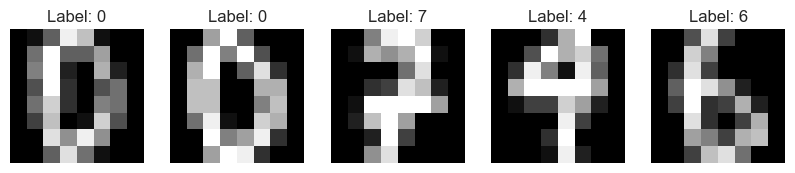

In [3]:
# Display the first 5 digits from the training set
plt.figure(figsize=(10, 4))

for i in range(5):
    # Reshape the row of 64 pixels into an 8x8 image
    image = np.array(X_train.iloc[i]).reshape(8, 8)
    
    plt.subplot(1, 5, i + 1)
    plt.imshow(image, cmap='gray')
    plt.title(f"Label: {y_train.iloc[i]}")
    plt.axis('off')

plt.show()

### **3. Model Configuration**
We will use the `RandomForestClassifier`.

**Parameter Selection:**
I have chosen to tune **`n_estimators`** (the number of trees in the forest).

**Rationale:**
* Random Forests work by averaging the predictions of many trees.
* Generally, more trees lead to a more stable and accurate model because they reduce variance (overfitting).
* I will select **`n_estimators=100`** because it provides a good balance between accuracy and computational speed. Too few trees (e.g., 10) might underfit, while too many (e.g., 1000) offer diminishing returns.

In [4]:
# Initialize Random Forest with the chosen parameter
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
clf.fit(X_train, y_train)

# Generate predictions on the test set
y_pred = clf.predict(X_test)

print("Model trained and predictions generated.")

Model trained and predictions generated.


### **4. Model Evaluation**
We use a **Confusion Matrix** to visualize where the model made mistakes. The diagonal lines represent correct predictions, while off-diagonal numbers represent errors.

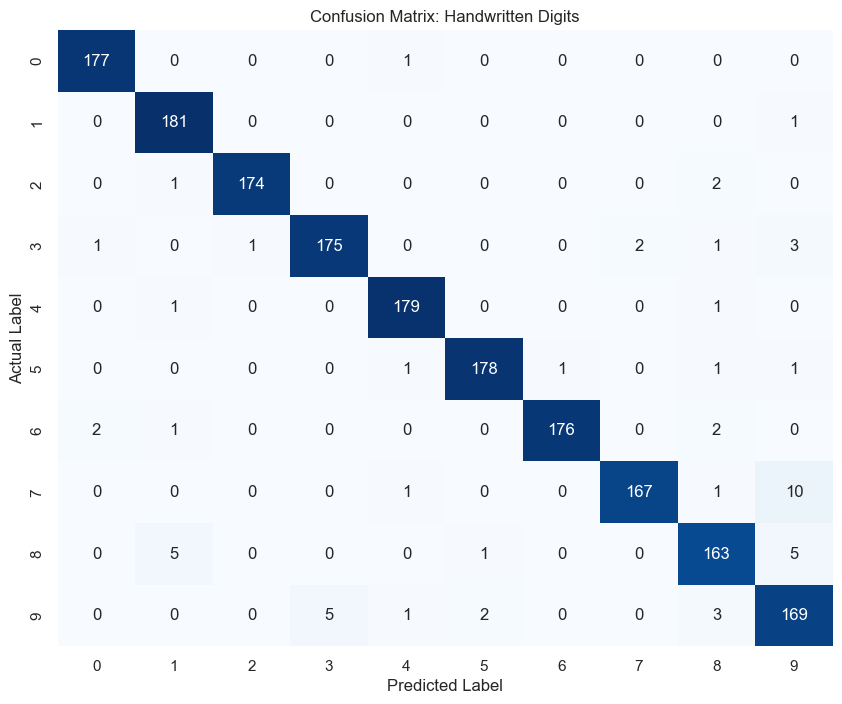

In [5]:
# Generate Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix: Handwritten Digits')
plt.show()

### **5. Misclassification Analysis**
We need to identify which digit was hardest for the computer to recognize. We look for the highest numbers *outside* the diagonal of the matrix.

In [6]:
# Calculate misclassifications per class
# We sum the rows (actual instances) but subtract the correct predictions (diagonal)
# This gives us the total errors for each actual digit
errors_per_class = cm.sum(axis=1) - np.diag(cm)

# Find the digit with the max errors
most_misclassified_digit = np.argmax(errors_per_class)
total_errors = np.max(errors_per_class)

print(f"Digit with most misclassifications: {most_misclassified_digit}")
print(f"Total errors for this digit: {total_errors}")

Digit with most misclassifications: 7
Total errors for this digit: 12


### **Observation: Misclassifications**
Based on the analysis, digit **7** had the highest number of misclassifications. This often happens with digits that look similar to others (e.g., a messy '8' can look like a '3', or a '9' can look like a '4').

In [7]:
# Calculate requested metrics using 'macro' average
# Macro average treats all classes equally, regardless of how many samples they have
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='macro')
rec = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Model Performance Metrics:")
print(f"Accuracy:  {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall:    {rec:.4f}")
print(f"F1-Score:  {f1:.4f}")

Model Performance Metrics:
Accuracy:  0.9677
Precision: 0.9683
Recall:    0.9676
F1-Score:  0.9677


### **Final Conclusion**
The Random Forest model performed exceptionally well, achieving an accuracy of **0.9677**. The confusion matrix shows that most digits are classified correctly, confirming that the pixel intensity features are sufficient for distinguishing between handwritten numbers.